# Final Pipeline for the Paper

In [1]:
import nbimporter
import FinalClass as suplr
import TDFileParse as tdparse
from collections import Counter
import csv
import pickle

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

importing Jupyter notebook from FinalClass.ipynb
importing Jupyter notebook from TDFileParse.ipynb


In [ ]:
import imp
imp.reload(suplr)

## Color Palette for plotting

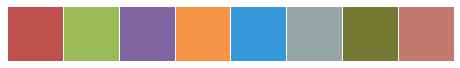

In [2]:
palette = ["#C0504D","#9BBA58","#8063A1","#F79546","#3498db", "#95a5a6",  "#747A32", "#C1796F"]

sns.palplot(sns.color_palette(palette))

## Main Program for one kind of data

In [3]:
folder = os.path.join('paperData')

scenario = 'outdoor'
datatype = 'raw'
labeltype = 'simple_multi'

X,y,X1,y1,inputDataStats = tdparse.getInputData(scenario=scenario, datatype=datatype,labeltype=labeltype, folder=folder)


MultiClass : Parsing X from paperData
Scenario: outdoor
Labeling: simple_multi
Datatype: raw
-------------------------------------------------------------------------------------
The Shape of training data is (6907, 576)
The Shape of testing data is (2009, 576)
-------------------------------------------------------------------------------------
The bincount for training labels is Counter({2: 2407, 1: 1866, 0: 1460, 3: 1174})
The bincount for testing labels is Counter({2: 665, 1: 652, 3: 411, 0: 281})
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------


### Initializing the Supervised Learning Class, derivation of optimal parameters and final model fitting

Creating training and validation set from X and testing sets from the X1
The shape of X_train is (690, 576)
The labels are [0, 1, 2, 3]
The bincount of training labels is [146 188 245 111]
------------------------------------------------------------------------
The shape of X_valid is (6217, 576)
The labels are [0, 1, 2, 3]
The bincount of validation labels is [1314 1678 2162 1063]
------------------------------------------------------------------------
The shape of X_test is (2009, 576)
The labels are [0, 1, 2, 3]
The bincount of testing labels is [281 652 665 411]
Initializing Model grid and Parameter grid...
Model and Parameters Not Provided. Taking Default values instead....
Starting Grid Search for kNearestNeighbors
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    9.8s finished


The best score for kNearestNeighbors is 0.984057971014
The best params are {'n_neighbors': 2}
Starting Grid Search for ExtraTreesClassifier
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    8.4s finished


The best score for ExtraTreesClassifier is 1.0
The best params are {'max_features': 'auto', 'criterion': 'gini', 'n_estimators': 16}
Starting Grid Search for Perceptron
Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.0s finished


The best score for Perceptron is 0.94347826087
The best params are {'estimator__alpha': 0.0001}
Starting Grid Search for DecisionTreeClassifier
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.8s finished


The best score for DecisionTreeClassifier is 0.947826086957
The best params are {'max_features': 'sqrt', 'criterion': 'gini'}
Starting Grid Search for LogisticRegression
Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    9.4s finished


The best score for LogisticRegression is 0.98115942029
The best params are {'C': 10, 'solver': 'lbfgs'}
Starting Grid Search for LinearSVC
Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    3.1s finished


The best score for LinearSVC is 0.976811594203
The best params are {'estimator__C': 0.01}
Starting Grid Search for GradientBoostingClassifier
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   25.5s finished


The best score for GradientBoostingClassifier is 0.995652173913
The best params are {'n_estimators': 16, 'learning_rate': 0.5}
Starting Grid Search for RandomForestClassifier
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   15.7s finished


The best score for RandomForestClassifier is 1.0
The best params are {'max_features': 'auto', 'criterion': 'gini', 'n_estimators': 16}


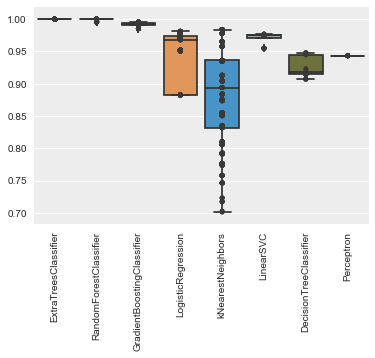

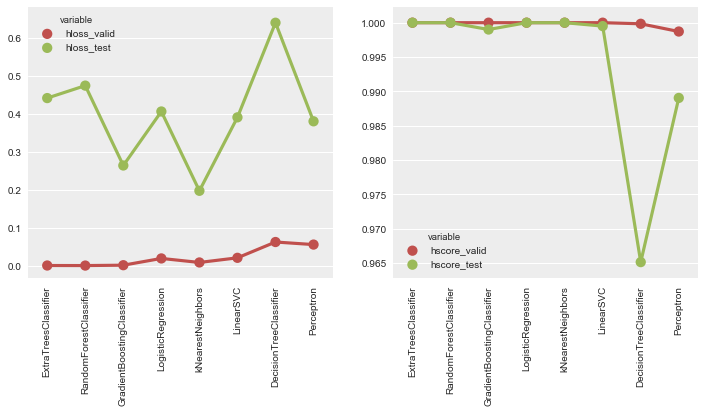

In [4]:
mlobject = suplr.SupervisedLearning(X=X,y=y,X_test=X1,y_test=y1)
mlobject.preprocess()
mlobject.plotDataStatistics(plot=False)
mlobject.grid_init()
mlobject.grid_fit()
mlobject.optimalmodel_fit()
mlobject.plotgridscores(colorpalette = palette)
mlobject.plotfinalresults(colorpalette = palette)

### for All kinds of data in the paperData folder

In [7]:
appended_data = []
grid_scores = []

folder = os.path.join('paperData')


labeltypes = ['simple_multi','grid']
scenarios = ['indoor', 'outdoor']
datatypes = ['raw', 'baseband', 'motionfiltered']

for scenario in scenarios:
    for labeltype in labeltypes:
        for datatype in datatypes:
            X,y,X1,y1,inputDataStats = tdparse.getInputData(scenario=scenario, datatype=datatype,labeltype=labeltype, folder=folder)
            mlobject = suplr.SupervisedLearning(X=X,y=y,X_test=X1,y_test=y1)
            mlobject.preprocess()
            mlobject.grid_init()
            mlobject.grid_fit()
            
            mlobject.gridframe['labeltype'] = labeltype
            mlobject.gridframe['datatype'] = datatype
            mlobject.gridframe['scenario'] = scenario
            
            grid_scores.append(mlobject.gridframe)
            
            
            mlobject.optimalmodel_fit()
            
            mlobject.finalscoresframe['labeltype'] = labeltype
            mlobject.finalscoresframe['datatype'] = datatype
            mlobject.finalscoresframe['scenario'] = scenario
            
            appended_data.append(mlobject.finalscoresframe)
            
final_dataframe = pd.concat(appended_data,axis=0)
final_gridscores = pd.concat(grid_scores, axis=0)
            
            
            


MultiClass : Parsing X from paperData
Scenario: indoor
Labeling: simple_multi
Datatype: raw
-------------------------------------------------------------------------------------
The Shape of training data is (5582, 480)
The Shape of testing data is (2690, 480)
-------------------------------------------------------------------------------------
The bincount for training labels is Counter({0: 2350, 1: 1339, 3: 950, 2: 943})
The bincount for testing labels is Counter({3: 800, 0: 785, 2: 693, 1: 412})
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Creating training and validation set from X and testing sets from the X1
Initializing Model grid and Parameter grid...
Model and Parameters Not Provided. Taking Default values instead....
Starting Grid Search for kNearestNeighbors
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    5.7s finished


The best score for kNearestNeighbors is 0.901433691756
The best params are {'n_neighbors': 1}
Starting Grid Search for ExtraTreesClassifier
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    6.3s finished


The best score for ExtraTreesClassifier is 0.996415770609
The best params are {'max_features': 'auto', 'criterion': 'gini', 'n_estimators': 16}
Starting Grid Search for Perceptron
Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.0s finished


The best score for Perceptron is 0.962365591398
The best params are {'estimator__alpha': 0.0001}
Starting Grid Search for DecisionTreeClassifier
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.9s finished


The best score for DecisionTreeClassifier is 0.989247311828
The best params are {'max_features': 'sqrt', 'criterion': 'gini'}
Starting Grid Search for LogisticRegression
Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    7.8s finished


The best score for LogisticRegression is 0.978494623656
The best params are {'C': 1000, 'solver': 'lbfgs'}
Starting Grid Search for LinearSVC
Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    2.5s finished


The best score for LinearSVC is 0.967741935484
The best params are {'estimator__C': 0.01}
Starting Grid Search for GradientBoostingClassifier
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   16.1s finished


The best score for GradientBoostingClassifier is 0.991039426523
The best params are {'learning_rate': 0.2, 'n_estimators': 64}
Starting Grid Search for RandomForestClassifier
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    9.7s finished


The best score for RandomForestClassifier is 0.996415770609
The best params are {'max_features': 'auto', 'criterion': 'gini', 'n_estimators': 16}

MultiClass : Parsing X from paperData
Scenario: indoor
Labeling: simple_multi
Datatype: baseband
-------------------------------------------------------------------------------------
The Shape of training data is (5583, 480)
The Shape of testing data is (2692, 480)
-------------------------------------------------------------------------------------
The bincount for training labels is Counter({0: 2351, 1: 1340, 3: 949, 2: 943})
The bincount for testing labels is Counter({3: 801, 0: 785, 2: 694, 1: 412})
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Creating training and validation set from X and testing sets from the X1
Initializing Model grid and Parameter grid...
Model and Parameters Not Provided. Taking Default val

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    5.2s finished


The best score for kNearestNeighbors is 0.897849462366
The best params are {'n_neighbors': 1}
Starting Grid Search for ExtraTreesClassifier
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    6.0s finished


The best score for ExtraTreesClassifier is 0.996415770609
The best params are {'max_features': 'auto', 'criterion': 'gini', 'n_estimators': 16}
Starting Grid Search for Perceptron
Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.0s finished


The best score for Perceptron is 0.965949820789
The best params are {'estimator__alpha': 0.0001}
Starting Grid Search for DecisionTreeClassifier
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.8s finished


The best score for DecisionTreeClassifier is 0.991039426523
The best params are {'max_features': 'sqrt', 'criterion': 'gini'}
Starting Grid Search for LogisticRegression
Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    6.3s finished


The best score for LogisticRegression is 0.989247311828
The best params are {'C': 1000, 'solver': 'lbfgs'}
Starting Grid Search for LinearSVC
Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    2.5s finished


The best score for LinearSVC is 0.969534050179
The best params are {'estimator__C': 0.1}
Starting Grid Search for GradientBoostingClassifier
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   15.6s finished


The best score for GradientBoostingClassifier is 0.996415770609
The best params are {'learning_rate': 0.2, 'n_estimators': 32}
Starting Grid Search for RandomForestClassifier
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    9.2s finished


The best score for RandomForestClassifier is 0.996415770609
The best params are {'max_features': 'auto', 'criterion': 'gini', 'n_estimators': 16}

MultiClass : Parsing X from paperData
Scenario: indoor
Labeling: simple_multi
Datatype: motionfiltered
-------------------------------------------------------------------------------------
The Shape of training data is (5583, 480)
The Shape of testing data is (2692, 480)
-------------------------------------------------------------------------------------
The bincount for training labels is Counter({0: 2350, 1: 1340, 3: 950, 2: 943})
The bincount for testing labels is Counter({3: 801, 0: 785, 2: 694, 1: 412})
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Creating training and validation set from X and testing sets from the X1
Initializing Model grid and Parameter grid...
Model and Parameters Not Provided. Taking Defau

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    5.4s finished


The best score for kNearestNeighbors is 0.464157706093
The best params are {'n_neighbors': 2}
Starting Grid Search for ExtraTreesClassifier
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    9.0s finished


The best score for ExtraTreesClassifier is 0.768817204301
The best params are {'max_features': 'sqrt', 'criterion': 'entropy', 'n_estimators': 32}
Starting Grid Search for Perceptron
Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.0s finished


The best score for Perceptron is 0.333333333333
The best params are {'estimator__alpha': 0.0001}
Starting Grid Search for DecisionTreeClassifier
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.8s finished


The best score for DecisionTreeClassifier is 0.645161290323
The best params are {'max_features': 'sqrt', 'criterion': 'entropy'}
Starting Grid Search for LogisticRegression
Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    7.7s finished


The best score for LogisticRegression is 0.467741935484
The best params are {'C': 0.001, 'solver': 'lbfgs'}
Starting Grid Search for LinearSVC
Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    7.5s finished


The best score for LinearSVC is 0.381720430108
The best params are {'estimator__C': 0.01}
Starting Grid Search for GradientBoostingClassifier
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   42.0s finished


The best score for GradientBoostingClassifier is 0.783154121864
The best params are {'n_estimators': 128, 'learning_rate': 0.2}
Starting Grid Search for RandomForestClassifier
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   18.5s finished


The best score for RandomForestClassifier is 0.768817204301
The best params are {'max_features': 'auto', 'criterion': 'entropy', 'n_estimators': 128}

MultiClass : Parsing X from paperData
Scenario: indoor
Labeling: grid
Datatype: raw
-------------------------------------------------------------------------------------
The Shape of training data is (2584, 576)
The Shape of testing data is (803, 576)
-------------------------------------------------------------------------------------
The bincount for training labels is Counter({0: 359, 2: 313, 9: 308, 4: 288, 8: 246, 3: 243, 6: 234, 1: 227, 7: 208, 5: 158})
The bincount for testing labels is Counter({8: 129, 0: 123, 7: 102, 3: 90, 6: 82, 1: 65, 2: 60, 9: 56, 5: 53, 4: 43})
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Creating training and validation set from X and testing sets from the X1
Initializing Model gri

[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.9s finished


The best score for kNearestNeighbors is 0.658914728682
The best params are {'n_neighbors': 2}
Starting Grid Search for ExtraTreesClassifier
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    6.4s finished


The best score for ExtraTreesClassifier is 0.961240310078
The best params are {'max_features': 'sqrt', 'criterion': 'entropy', 'n_estimators': 128}
Starting Grid Search for Perceptron
Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.0s finished


The best score for Perceptron is 0.62015503876
The best params are {'estimator__alpha': 0.0001}
Starting Grid Search for DecisionTreeClassifier
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.8s finished


The best score for DecisionTreeClassifier is 0.817829457364
The best params are {'max_features': 'sqrt', 'criterion': 'gini'}
Starting Grid Search for LogisticRegression
Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    7.1s finished


The best score for LogisticRegression is 0.779069767442
The best params are {'C': 0.01, 'solver': 'lbfgs'}
Starting Grid Search for LinearSVC
Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    2.6s finished


The best score for LinearSVC is 0.713178294574
The best params are {'estimator__C': 0.001}
Starting Grid Search for GradientBoostingClassifier
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   19.0s finished


The best score for GradientBoostingClassifier is 0.868217054264
The best params are {'learning_rate': 0.8, 'n_estimators': 32}
Starting Grid Search for RandomForestClassifier
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   10.6s finished


The best score for RandomForestClassifier is 0.96511627907
The best params are {'max_features': 'auto', 'criterion': 'entropy', 'n_estimators': 256}

MultiClass : Parsing X from paperData
Scenario: indoor
Labeling: grid
Datatype: baseband
-------------------------------------------------------------------------------------
The Shape of training data is (2591, 576)
The Shape of testing data is (811, 576)
-------------------------------------------------------------------------------------
The bincount for training labels is Counter({0: 359, 2: 314, 9: 309, 4: 289, 8: 247, 3: 243, 6: 235, 1: 228, 7: 208, 5: 159})
The bincount for testing labels is Counter({8: 130, 0: 124, 7: 103, 3: 91, 6: 81, 1: 66, 2: 61, 9: 57, 5: 54, 4: 44})
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Creating training and validation set from X and testing sets from the X1
Initializing Model

[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.9s finished


The best score for kNearestNeighbors is 0.710424710425
The best params are {'n_neighbors': 3}
Starting Grid Search for ExtraTreesClassifier
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    6.2s finished


The best score for ExtraTreesClassifier is 0.980694980695
The best params are {'max_features': 'sqrt', 'criterion': 'gini', 'n_estimators': 32}
Starting Grid Search for Perceptron
Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.0s finished


The best score for Perceptron is 0.694980694981
The best params are {'estimator__alpha': 0.0001}
Starting Grid Search for DecisionTreeClassifier
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.8s finished


The best score for DecisionTreeClassifier is 0.864864864865
The best params are {'max_features': 'sqrt', 'criterion': 'gini'}
Starting Grid Search for LogisticRegression
Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    7.3s finished


The best score for LogisticRegression is 0.864864864865
The best params are {'C': 0.01, 'solver': 'sag'}
Starting Grid Search for LinearSVC
Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    4.5s finished


The best score for LinearSVC is 0.822393822394
The best params are {'estimator__C': 0.001}
Starting Grid Search for GradientBoostingClassifier
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   19.8s finished


The best score for GradientBoostingClassifier is 0.888030888031
The best params are {'n_estimators': 16, 'learning_rate': 0.8}
Starting Grid Search for RandomForestClassifier
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   10.7s finished


The best score for RandomForestClassifier is 0.980694980695
The best params are {'max_features': 'auto', 'criterion': 'gini', 'n_estimators': 64}


C:\Users\Raja\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



MultiClass : Parsing X from paperData
Scenario: indoor
Labeling: grid
Datatype: motionfiltered
-------------------------------------------------------------------------------------
The Shape of training data is (2591, 576)
The Shape of testing data is (809, 576)
-------------------------------------------------------------------------------------
The bincount for training labels is Counter({0: 359, 2: 314, 9: 309, 4: 289, 8: 247, 3: 243, 6: 235, 1: 228, 7: 208, 5: 159})
The bincount for testing labels is Counter({8: 130, 0: 124, 7: 102, 3: 91, 6: 82, 1: 66, 2: 60, 9: 57, 5: 54, 4: 43})
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Creating training and validation set from X and testing sets from the X1
Initializing Model grid and Parameter grid...
Model and Parameters Not Provided. Taking Default values instead....
Starting Grid Search for kNearestNeighbors
Fit

[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.9s finished


The best score for kNearestNeighbors is 0.162162162162
The best params are {'n_neighbors': 1}
Starting Grid Search for ExtraTreesClassifier
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    7.2s finished


The best score for ExtraTreesClassifier is 0.579150579151
The best params are {'max_features': 'auto', 'criterion': 'gini', 'n_estimators': 256}
Starting Grid Search for Perceptron
Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.0s finished


The best score for Perceptron is 0.131274131274
The best params are {'estimator__alpha': 0.0001}
Starting Grid Search for DecisionTreeClassifier
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.8s finished


The best score for DecisionTreeClassifier is 0.370656370656
The best params are {'max_features': 'auto', 'criterion': 'entropy'}
Starting Grid Search for LogisticRegression
Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    7.3s finished


The best score for LogisticRegression is 0.162162162162
The best params are {'C': 0.001, 'solver': 'lbfgs'}
Starting Grid Search for LinearSVC
Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    4.9s finished


The best score for LinearSVC is 0.15444015444
The best params are {'estimator__C': 0.001}
Starting Grid Search for GradientBoostingClassifier
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   35.1s finished


The best score for GradientBoostingClassifier is 0.428571428571
The best params are {'learning_rate': 0.2, 'n_estimators': 32}
Starting Grid Search for RandomForestClassifier
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   13.9s finished


The best score for RandomForestClassifier is 0.540540540541
The best params are {'max_features': 'sqrt', 'criterion': 'gini', 'n_estimators': 128}

MultiClass : Parsing X from paperData
Scenario: outdoor
Labeling: simple_multi
Datatype: raw
-------------------------------------------------------------------------------------
The Shape of training data is (6907, 576)
The Shape of testing data is (2009, 576)
-------------------------------------------------------------------------------------
The bincount for training labels is Counter({2: 2407, 1: 1866, 0: 1460, 3: 1174})
The bincount for testing labels is Counter({2: 665, 1: 652, 3: 411, 0: 281})
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Creating training and validation set from X and testing sets from the X1
Initializing Model grid and Parameter grid...
Model and Parameters Not Provided. Taking Default valu

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    8.6s finished


The best score for kNearestNeighbors is 0.984057971014
The best params are {'n_neighbors': 2}
Starting Grid Search for ExtraTreesClassifier
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    7.7s finished


The best score for ExtraTreesClassifier is 1.0
The best params are {'max_features': 'auto', 'criterion': 'gini', 'n_estimators': 32}
Starting Grid Search for Perceptron
Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.0s finished


The best score for Perceptron is 0.94347826087
The best params are {'estimator__alpha': 0.0001}
Starting Grid Search for DecisionTreeClassifier
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.8s finished


The best score for DecisionTreeClassifier is 0.969565217391
The best params are {'max_features': 'sqrt', 'criterion': 'gini'}
Starting Grid Search for LogisticRegression
Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    9.4s finished


The best score for LogisticRegression is 0.98115942029
The best params are {'C': 10, 'solver': 'lbfgs'}
Starting Grid Search for LinearSVC
Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    3.1s finished


The best score for LinearSVC is 0.976811594203
The best params are {'estimator__C': 0.01}
Starting Grid Search for GradientBoostingClassifier
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   25.1s finished


The best score for GradientBoostingClassifier is 0.997101449275
The best params are {'learning_rate': 0.5, 'n_estimators': 16}
Starting Grid Search for RandomForestClassifier
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   15.9s finished


The best score for RandomForestClassifier is 1.0
The best params are {'max_features': 'auto', 'criterion': 'gini', 'n_estimators': 128}

MultiClass : Parsing X from paperData
Scenario: outdoor
Labeling: simple_multi
Datatype: baseband
-------------------------------------------------------------------------------------
The Shape of training data is (6931, 576)
The Shape of testing data is (2012, 576)
-------------------------------------------------------------------------------------
The bincount for training labels is Counter({2: 2417, 1: 1874, 0: 1461, 3: 1179})
The bincount for testing labels is Counter({2: 667, 1: 652, 3: 411, 0: 282})
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Creating training and validation set from X and testing sets from the X1
Initializing Model grid and Parameter grid...
Model and Parameters Not Provided. Taking Default values ins

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    9.1s finished


The best score for kNearestNeighbors is 0.979797979798
The best params are {'n_neighbors': 2}
Starting Grid Search for ExtraTreesClassifier
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    7.5s finished


The best score for ExtraTreesClassifier is 1.0
The best params are {'max_features': 'auto', 'criterion': 'gini', 'n_estimators': 16}
Starting Grid Search for Perceptron
Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.0s finished


The best score for Perceptron is 0.94227994228
The best params are {'estimator__alpha': 0.0001}
Starting Grid Search for DecisionTreeClassifier
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.8s finished


The best score for DecisionTreeClassifier is 0.978354978355
The best params are {'max_features': 'sqrt', 'criterion': 'entropy'}
Starting Grid Search for LogisticRegression
Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    9.8s finished


The best score for LogisticRegression is 0.969696969697
The best params are {'C': 10, 'solver': 'lbfgs'}
Starting Grid Search for LinearSVC
Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    3.6s finished


The best score for LinearSVC is 0.969696969697
The best params are {'estimator__C': 0.1}
Starting Grid Search for GradientBoostingClassifier
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   23.3s finished


The best score for GradientBoostingClassifier is 0.998556998557
The best params are {'learning_rate': 0.8, 'n_estimators': 16}
Starting Grid Search for RandomForestClassifier
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   15.2s finished


The best score for RandomForestClassifier is 1.0
The best params are {'max_features': 'auto', 'criterion': 'gini', 'n_estimators': 16}

MultiClass : Parsing X from paperData
Scenario: outdoor
Labeling: simple_multi
Datatype: motionfiltered
-------------------------------------------------------------------------------------
The Shape of training data is (6931, 576)
The Shape of testing data is (2012, 576)
-------------------------------------------------------------------------------------
The bincount for training labels is Counter({2: 2417, 1: 1874, 0: 1461, 3: 1179})
The bincount for testing labels is Counter({2: 667, 1: 652, 3: 411, 0: 282})
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Creating training and validation set from X and testing sets from the X1
Initializing Model grid and Parameter grid...
Model and Parameters Not Provided. Taking Default value

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    9.5s finished


The best score for kNearestNeighbors is 0.655122655123
The best params are {'n_neighbors': 1}
Starting Grid Search for ExtraTreesClassifier
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   10.5s finished


The best score for ExtraTreesClassifier is 0.981240981241
The best params are {'max_features': 'auto', 'criterion': 'gini', 'n_estimators': 128}
Starting Grid Search for Perceptron
Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.0s finished


The best score for Perceptron is 0.34632034632
The best params are {'estimator__alpha': 0.0001}
Starting Grid Search for DecisionTreeClassifier
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.9s finished


The best score for DecisionTreeClassifier is 0.835497835498
The best params are {'max_features': 'sqrt', 'criterion': 'gini'}
Starting Grid Search for LogisticRegression
Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:   12.7s finished


The best score for LogisticRegression is 0.382395382395
The best params are {'C': 0.01, 'solver': 'lbfgs'}
Starting Grid Search for LinearSVC
Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:   13.5s finished


The best score for LinearSVC is 0.402597402597
The best params are {'estimator__C': 0.001}
Starting Grid Search for GradientBoostingClassifier
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   43.2s finished


The best score for GradientBoostingClassifier is 0.976911976912
The best params are {'n_estimators': 128, 'learning_rate': 0.2}
Starting Grid Search for RandomForestClassifier
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   24.7s finished


The best score for RandomForestClassifier is 0.981240981241
The best params are {'max_features': 'sqrt', 'criterion': 'gini', 'n_estimators': 64}

MultiClass : Parsing X from paperData
Scenario: outdoor
Labeling: grid
Datatype: raw
-------------------------------------------------------------------------------------
The Shape of training data is (4248, 480)
The Shape of testing data is (1731, 480)
-------------------------------------------------------------------------------------
The bincount for training labels is Counter({0: 1052, 1: 442, 9: 398, 3: 367, 8: 365, 6: 361, 7: 349, 5: 342, 2: 336, 4: 236})
The bincount for testing labels is Counter({0: 769, 3: 138, 6: 122, 5: 117, 7: 112, 9: 109, 8: 101, 4: 98, 1: 83, 2: 82})
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Creating training and validation set from X and testing sets from the X1
Initializing Model 

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.6s finished


The best score for kNearestNeighbors is 0.608490566038
The best params are {'n_neighbors': 1}
Starting Grid Search for ExtraTreesClassifier
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    7.6s finished


The best score for ExtraTreesClassifier is 0.962264150943
The best params are {'max_features': 'sqrt', 'criterion': 'gini', 'n_estimators': 256}
Starting Grid Search for Perceptron
Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.1s finished


The best score for Perceptron is 0.490566037736
The best params are {'estimator__alpha': 0.0001}
Starting Grid Search for DecisionTreeClassifier
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.8s finished


The best score for DecisionTreeClassifier is 0.740566037736
The best params are {'max_features': 'sqrt', 'criterion': 'gini'}
Starting Grid Search for LogisticRegression
Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:   11.0s finished


The best score for LogisticRegression is 0.740566037736
The best params are {'C': 0.01, 'solver': 'sag'}
Starting Grid Search for LinearSVC
Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    5.1s finished


The best score for LinearSVC is 0.695754716981
The best params are {'estimator__C': 0.001}
Starting Grid Search for GradientBoostingClassifier
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   33.3s finished


The best score for GradientBoostingClassifier is 0.849056603774
The best params are {'learning_rate': 0.5, 'n_estimators': 32}
Starting Grid Search for RandomForestClassifier
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   15.1s finished


The best score for RandomForestClassifier is 0.955188679245
The best params are {'max_features': 'log2', 'criterion': 'gini', 'n_estimators': 256}


C:\Users\Raja\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



MultiClass : Parsing X from paperData
Scenario: outdoor
Labeling: grid
Datatype: baseband
-------------------------------------------------------------------------------------
The Shape of training data is (4255, 480)
The Shape of testing data is (1741, 480)
-------------------------------------------------------------------------------------
The bincount for training labels is Counter({0: 1053, 1: 442, 9: 398, 3: 368, 8: 366, 6: 362, 7: 349, 5: 343, 2: 337, 4: 237})
The bincount for testing labels is Counter({0: 771, 3: 139, 6: 123, 5: 118, 7: 113, 9: 110, 8: 101, 4: 99, 1: 84, 2: 83})
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Creating training and validation set from X and testing sets from the X1
Initializing Model grid and Parameter grid...
Model and Parameters Not Provided. Taking Default values instead....
Starting Grid Search for kNearestNeighbors
Fi

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.6s finished


The best score for kNearestNeighbors is 0.543529411765
The best params are {'n_neighbors': 1}
Starting Grid Search for ExtraTreesClassifier
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    7.4s finished


The best score for ExtraTreesClassifier is 0.976470588235
The best params are {'max_features': 'sqrt', 'criterion': 'gini', 'n_estimators': 128}
Starting Grid Search for Perceptron
Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.1s finished


The best score for Perceptron is 0.494117647059
The best params are {'estimator__alpha': 0.0001}
Starting Grid Search for DecisionTreeClassifier
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.9s finished


The best score for DecisionTreeClassifier is 0.752941176471
The best params are {'max_features': 'auto', 'criterion': 'entropy'}
Starting Grid Search for LogisticRegression
Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:   12.5s finished


The best score for LogisticRegression is 0.708235294118
The best params are {'C': 0.01, 'solver': 'sag'}
Starting Grid Search for LinearSVC
Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    6.9s finished


The best score for LinearSVC is 0.668235294118
The best params are {'estimator__C': 0.01}
Starting Grid Search for GradientBoostingClassifier
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   33.0s finished


The best score for GradientBoostingClassifier is 0.901176470588
The best params are {'learning_rate': 0.2, 'n_estimators': 128}
Starting Grid Search for RandomForestClassifier
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   14.6s finished


The best score for RandomForestClassifier is 0.967058823529
The best params are {'max_features': 'auto', 'criterion': 'gini', 'n_estimators': 256}


C:\Users\Raja\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



MultiClass : Parsing X from paperData
Scenario: outdoor
Labeling: grid
Datatype: motionfiltered
-------------------------------------------------------------------------------------
The Shape of training data is (4254, 480)
The Shape of testing data is (1741, 480)
-------------------------------------------------------------------------------------
The bincount for training labels is Counter({0: 1053, 1: 442, 9: 398, 3: 368, 8: 366, 6: 362, 7: 349, 5: 343, 2: 336, 4: 237})
The bincount for testing labels is Counter({0: 771, 3: 139, 6: 123, 5: 118, 7: 113, 9: 110, 8: 101, 4: 99, 1: 84, 2: 83})
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Creating training and validation set from X and testing sets from the X1
Initializing Model grid and Parameter grid...
Model and Parameters Not Provided. Taking Default values instead....
Starting Grid Search for kNearestNeighb

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    3.6s finished


The best score for kNearestNeighbors is 0.258823529412
The best params are {'n_neighbors': 5}
Starting Grid Search for ExtraTreesClassifier
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    9.0s finished


The best score for ExtraTreesClassifier is 0.548235294118
The best params are {'max_features': 'auto', 'criterion': 'gini', 'n_estimators': 256}
Starting Grid Search for Perceptron
Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.1s finished


The best score for Perceptron is 0.16
The best params are {'estimator__alpha': 0.0001}
Starting Grid Search for DecisionTreeClassifier
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.8s finished


The best score for DecisionTreeClassifier is 0.308235294118
The best params are {'max_features': 'auto', 'criterion': 'gini'}
Starting Grid Search for LogisticRegression
Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:   10.3s finished


The best score for LogisticRegression is 0.249411764706
The best params are {'C': 0.01, 'solver': 'lbfgs'}
Starting Grid Search for LinearSVC
Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    8.8s finished


The best score for LinearSVC is 0.204705882353
The best params are {'estimator__C': 0.01}
Starting Grid Search for GradientBoostingClassifier
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   58.0s finished


The best score for GradientBoostingClassifier is 0.435294117647
The best params are {'learning_rate': 0.2, 'n_estimators': 64}
Starting Grid Search for RandomForestClassifier
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   20.6s finished


The best score for RandomForestClassifier is 0.550588235294
The best params are {'max_features': 'sqrt', 'criterion': 'gini', 'n_estimators': 128}


In [8]:
gs_indoor = pd.melt(final_gridscores[final_gridscores.scenario=='indoor'], id_vars=['name','datatype', 'labeltype'],\
             value_vars=['mean_score'])

gs_outdoor = pd.melt(final_gridscores[final_gridscores.scenario=='outdoor'], id_vars=['name','datatype', 'labeltype'],\
             value_vars=['mean_score'])

In [9]:
gs1 = gs_indoor[gs_indoor.datatype == 'raw']
gs2 = gs_indoor[gs_indoor.datatype == 'baseband']
gs3 = gs_indoor[gs_indoor.datatype == 'motionfiltered']

gs4 = gs_outdoor[gs_outdoor.datatype == 'raw']
gs5 = gs_outdoor[gs_outdoor.datatype == 'baseband']
gs6 = gs_outdoor[gs_outdoor.datatype == 'motionfiltered']

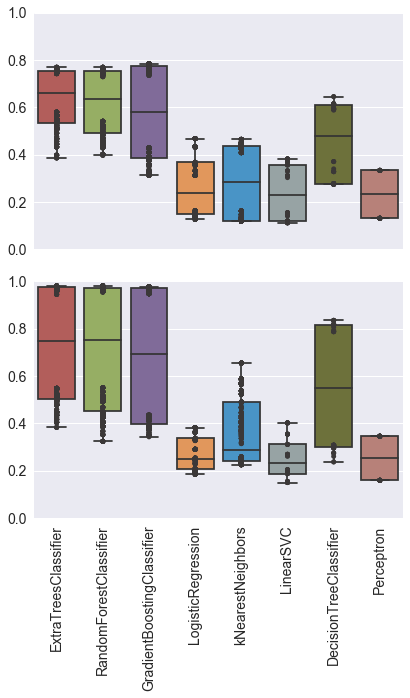

In [10]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set(font_scale=1.4)

plotorder = ['ExtraTreesClassifier','RandomForestClassifier','GradientBoostingClassifier','LogisticRegression','kNearestNeighbors',\
        'LinearSVC','DecisionTreeClassifier','Perceptron']

palette = ["#C0504D","#9BBA58","#8063A1","#F79546","#3498db", "#95a5a6",  "#747A32", "#C1796F"]

fig1 = plt.figure(figsize=(6,10))

a = fig1.add_subplot(211)
sns.boxplot(x='name', y='value', data = gs3, palette=palette, order=plotorder)

g = sns.stripplot(x='name', y='value', data = gs3, color='#3B3838', order=plotorder)
g.set(ylabel='', xlabel='', xticklabels='')
#a.set_title('Indoor')
a.set_ylim((0,1))

b = fig1.add_subplot(212)
sns.boxplot(x='name', y='value', data=gs6, palette=palette, order=plotorder)

g = sns.stripplot(x='name', y='value', data = gs6, color='#3B3838', order=plotorder)
g.set(ylabel='', xlabel='')
#b.set_title('Outdoor')
plt.xticks(rotation=90)
b.set_ylim((0,1))

#c = fig1.add_subplot(413)
#sns.boxplot(x='name', y='value', data=gs3[gs3.labeltype=='grid'], palette=palette, order=plotorder)

#g = sns.stripplot(x='name', y='value', data = gs3[gs3.labeltype=='grid'], color='#3B3838', order=plotorder)
#g.set(ylabel='', xlabel='', xticklabels='')
#c.set_title('Grid Labeling')
#c.set_ylim((0,1))

#a = fig1.add_subplot(414)
#sns.boxplot(x='name', y='value', data=gs6[gs6.labeltype=='grid'], palette=palette, order=plotorder)

#g = sns.stripplot(x='name', y='value', data = gs6[gs6.labeltype=='grid'], color='#3B3838', order=plotorder)
#g.set(ylabel='', xlabel='')
#plt.xticks(rotation=90)
#a.set_ylim((0,1))

fig1.tight_layout()
#fig1.savefig('posterimages/grid_mf.png', format='png', dpi=1200)


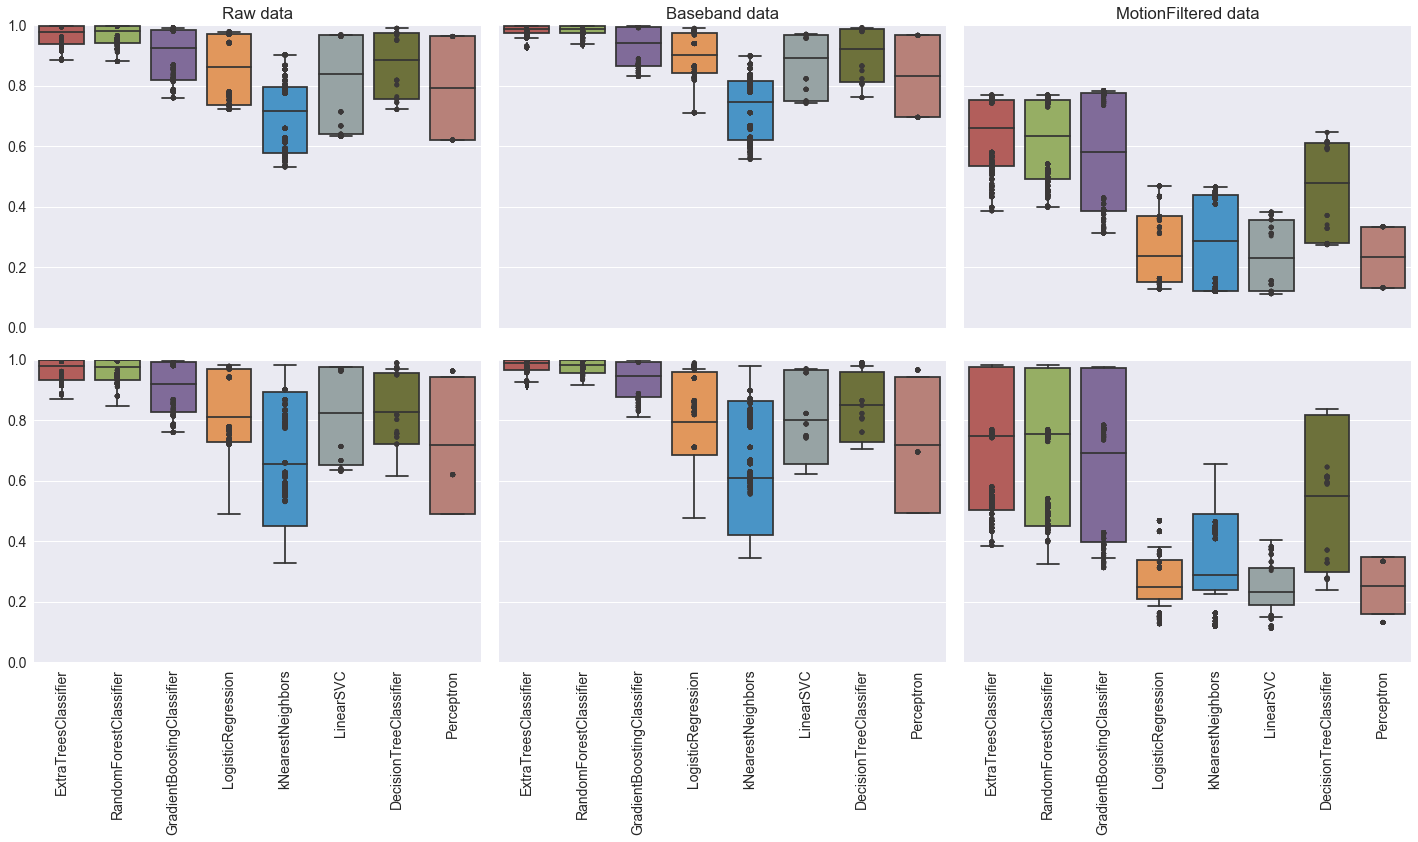

In [12]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set(font_scale=1.4)

plotorder = ['ExtraTreesClassifier','RandomForestClassifier','GradientBoostingClassifier','LogisticRegression','kNearestNeighbors',\
        'LinearSVC','DecisionTreeClassifier','Perceptron']

palette = ["#C0504D","#9BBA58","#8063A1","#F79546","#3498db", "#95a5a6",  "#747A32", "#C1796F"]

fig = plt.figure(figsize=(20,12))

a = fig.add_subplot(231)
sns.boxplot(x='name', y='value', data=gs1, palette=palette, order=plotorder)

g = sns.stripplot(x='name', y='value', data = gs1, color='#3B3838', order=plotorder)
g.set(ylabel='', xlabel='', xticklabels='')
a.set_title('Raw data')
a.set_ylim((0,1))

b = fig.add_subplot(232)
sns.boxplot(x='name', y='value', data=gs2, palette=palette, order=plotorder)

g = sns.stripplot(x='name', y='value', data = gs2, color='#3B3838', order=plotorder)
g.set(ylabel='', xlabel='', yticklabels='', xticklabels='')
b.set_title('Baseband data')
b.set_ylim((0,1))

c = fig.add_subplot(233)
sns.boxplot(x='name', y='value', data=gs3, palette=palette, order=plotorder)

g = sns.stripplot(x='name', y='value', data = gs3, color='#3B3838', order=plotorder)
g.set(ylabel='', xlabel='', yticklabels='', xticklabels='')
c.set_title('MotionFiltered data')
c.set_ylim((0,1))

a = fig.add_subplot(234)
sns.boxplot(x='name', y='value', data=gs4, palette=palette, order=plotorder)

g = sns.stripplot(x='name', y='value', data = gs1, color='#3B3838', order=plotorder)
g.set(ylabel='', xlabel='')
plt.xticks(rotation=90)
a.set_ylim((0,1))

b = fig.add_subplot(235)
sns.boxplot(x='name', y='value', data=gs5, palette=palette, order=plotorder)

g = sns.stripplot(x='name', y='value', data = gs2, color='#3B3838', order=plotorder)
g.set(ylabel='', xlabel='', yticklabels='')
plt.xticks(rotation=90)
b.set_ylim((0,1))

c = fig.add_subplot(236)
sns.boxplot(x='name', y='value', data=gs6, palette=palette, order=plotorder)

g = sns.stripplot(x='name', y='value', data = gs3, color='#3B3838', order=plotorder)
g.set(ylabel='', xlabel='', yticklabels='')
plt.xticks(rotation=90)
c.set_ylim((0,1))

fig.tight_layout()


In [32]:
fig.savefig('posterimages/gridscores_pres.png', format='png', dpi=1200)

In [ ]:
df = final_dataframe[final_dataframe.datatype=='motionfiltered']
df.rename(columns={'accuracy_valid': 'Validation', 'accuracy_test': 'Testing'}, inplace=True)


In [ ]:
df = pd.melt(df, id_vars=['name','labeltype', 'scenario'], value_vars=['Validation', 'Testing'], \
             var_name='Accuracy Type')


In [11]:
sns.set(font_scale=1.5,rc={'axes.facecolor':".9"})

g = sns.factorplot(x='name', y='value', hue='Accuracy Type', col='labeltype', row='scenario', kind='bar', \
               data=df, order=plotorder, palette=palette, size=5, aspect=1.8)
g.set_xticklabels(rotation=90)
g.set_ylabels('Accuracy')
g.set_xlabels('')

#g.savefig('posterimages/finalaccuracy.png', format='png', dpi=1200)

NameError: name 'df' is not defined

In [33]:
gs1

name datatype     labeltype    variable     value
0          kNearestNeighbors      raw  simple_multi  mean_score  0.901434
1          kNearestNeighbors      raw  simple_multi  mean_score  0.901434
2          kNearestNeighbors      raw  simple_multi  mean_score  0.867384
3          kNearestNeighbors      raw  simple_multi  mean_score  0.901434
4          kNearestNeighbors      raw  simple_multi  mean_score  0.867384
5          kNearestNeighbors      raw  simple_multi  mean_score  0.853047
6          kNearestNeighbors      raw  simple_multi  mean_score  0.901434
7          kNearestNeighbors      raw  simple_multi  mean_score  0.867384
8          kNearestNeighbors      raw  simple_multi  mean_score  0.853047
9          kNearestNeighbors      raw  simple_multi  mean_score  0.833333
10         kNearestNeighbors      raw  simple_multi  mean_score  0.901434
11         kNearestNeighbors      raw  simple_multi  mean_score  0.867384
12         kNearestNeighbors      raw  simple_multi  mean_score  0.853047
13         kNearestNeighbors      raw  simple_multi  mean_score  0.833333
14         kNearestNeighbors      raw  simple_multi  mean_score  0.831541
15         kNearestNeighbors      raw  simple_multi  mean_score  0.901434
16         kNearestNeighbors      raw  simple_multi  mean_score  0.867384
17         kNearestNeighbors      raw  simple_multi  mean_score  0.853047
18         kNearestNeighbors      raw  simple_multi  mean_score  0.833333
19         kNearestNeighbors      raw  simple_multi  mean_score  0.831541
20         kNearestNeighbors      raw  simple_multi  mean_score  0.817204
21         kNearestNeighbors      raw  simple_multi  mean_score  0.901434
22         kNearestNeighbors      raw  simple_multi  mean_score  0.867384
23         kNearestNeighbors      raw  simple_multi  mean_score  0.853047
24         kNearestNeighbors      raw  simple_multi  mean_score  0.833333
25         kNearestNeighbors      raw  simple_multi  mean_score  0.831541
26         kNearestNeighbors      raw  simple_multi  mean_score  0.817204
27         kNearestNeighbors      raw  simple_multi  mean_score  0.817204
28         kNearestNeighbors      raw  simple_multi  mean_score  0.901434
29         kNearestNeighbors      raw  simple_multi  mean_score  0.867384
...                      ...      ...           ...         ...       ...
7570  RandomForestClassifier      raw          grid  mean_score  0.922481
7571  RandomForestClassifier      raw          grid  mean_score  0.922481
7572  RandomForestClassifier      raw          grid  mean_score  0.949612
7573  RandomForestClassifier      raw          grid  mean_score  0.941860
7574  RandomForestClassifier      raw          grid  mean_score  0.953488
7575  RandomForestClassifier      raw          grid  mean_score  0.918605
7576  RandomForestClassifier      raw          grid  mean_score  0.945736
7577  RandomForestClassifier      raw          grid  mean_score  0.941860
7578  RandomForestClassifier      raw          grid  mean_score  0.957364
7579  RandomForestClassifier      raw          grid  mean_score  0.957364
7580  RandomForestClassifier      raw          grid  mean_score  0.879845
7581  RandomForestClassifier      raw          grid  mean_score  0.941860
7582  RandomForestClassifier      raw          grid  mean_score  0.930233
7583  RandomForestClassifier      raw          grid  mean_score  0.934109
7584  RandomForestClassifier      raw          grid  mean_score  0.949612
7585  RandomForestClassifier      raw          grid  mean_score  0.937984
7586  RandomForestClassifier      raw          grid  mean_score  0.941860
7587  RandomForestClassifier      raw          grid  mean_score  0.957364
7588  RandomForestClassifier      raw          grid  mean_score  0.957364
7589  RandomForestClassifier      raw          grid  mean_score  0.965116
7590  RandomForestClassifier      raw          grid  mean_score  0.937984
7591  RandomForestClassifier      raw          grid  mean_score  0.945736
7592  RandomForestClassifier

In [ ]:
final_dataframe.to_pickle('allsimresults.pkl')

In [ ]:
df = final_dataframe[final_dataframe.datatype=='motionfiltered']

In [ ]:
df = pd.melt(df,id_vars=['name','scenario','labeltype'],value_vars=['accuracy_valid', 'accuracy_test'])

In [ ]:
sns.set(font_scale=1.5,rc={'axes.facecolor':'#EDEDED'})

g = sns.factorplot(x ='name',y='value', hue='variable',col='labeltype', row='scenario', data = df, kind='bar', size=4, aspect=2)
g.set_xticklabels(rotation=90)
g.set_ylabels('Accuracy')
g.set_xlabels('')

In [ ]:
g.savefig('accuracy_mf.png',format='png', dpi=600)

In [ ]:
df_now = pd.read_pickle('allsimresults.pkl')

In [ ]:
#folder = 'TDSignals/'

#rawsignal = np.loadtxt(os.path.join(folder,'rawsignal.txt'), dtype=float)
#bbsignal = np.loadtxt(os.path.join(folder,'basebandsignal.txt'), dtype=float)
#mfsignal = np.loadtxt(os.path.join(folder,'mfsignal.txt'), dtype=float)

fig2 = plt.figure(figsize=(12,3))
#sns.set(rc={'axes.facecolor':'#EDEDED'})


raw = fig2.add_subplot(131)

raw.plot(datatest_rs[1], color = '#C0504D')
raw.set_yticks([])
raw.set_title('Raw Signal',fontsize=20)

bb = fig2.add_subplot(132)

bb.plot(datatest_bb[1],color = '#9BBA58')

bb.set_yticks([])
bb.set_title('Baseband Signal',fontsize=20)

mf = fig2.add_subplot(133)

mf.plot(datatest_mf[1],color = '#8063A1')
mf.set_yticks([])
mf.set_title('Motion Filtered Signal', fontsize=20)



fig2.tight_layout()
fig2.savefig('posterimages/tdsignals.png',format='png', dpi=2400)

In [ ]:
datatest_rs, datatest_bb, datatest_mf = fileparse('paperData/outdoor/grid/test/mrmlog_Box_13_006.csv', 10)

In [ ]:
dtest = datatest_bb[2] - datatest_bb[1]

## Redundant Code

In [ ]:
mlobject.finalscoresframe['datatype'] = 'motionfiltered'
mlobject.finalscoresframe['scenario'] = 'outdoor'
mlobject.finalscoresframe['datatype'] = 'raw'

In [45]:
plotorder = ['ExtraTreesClassifier','RandomForestClassifier','GradientBoostingClassifier','LogisticRegression','kNearestNeighbors',\
        'LinearSVC','DecisionTreeClassifier','Perceptron']

In [13]:
from sklearn.preprocessing import scale

In [17]:
data = np.array([[1,2,3],[4,5,6], [7,8,9]], dtype=np.float32)
data

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.]], dtype=float32)

In [19]:
test = scale(data)

In [31]:
np.shape(X)[1]/96*5850

29250.0

In [35]:
data_final = pd.melt(final_dataframe,id_vars=['name', 'labeltype', 'datatype', 'scenario'], value_vars=['accuracy_valid', 'accuracy_test'])

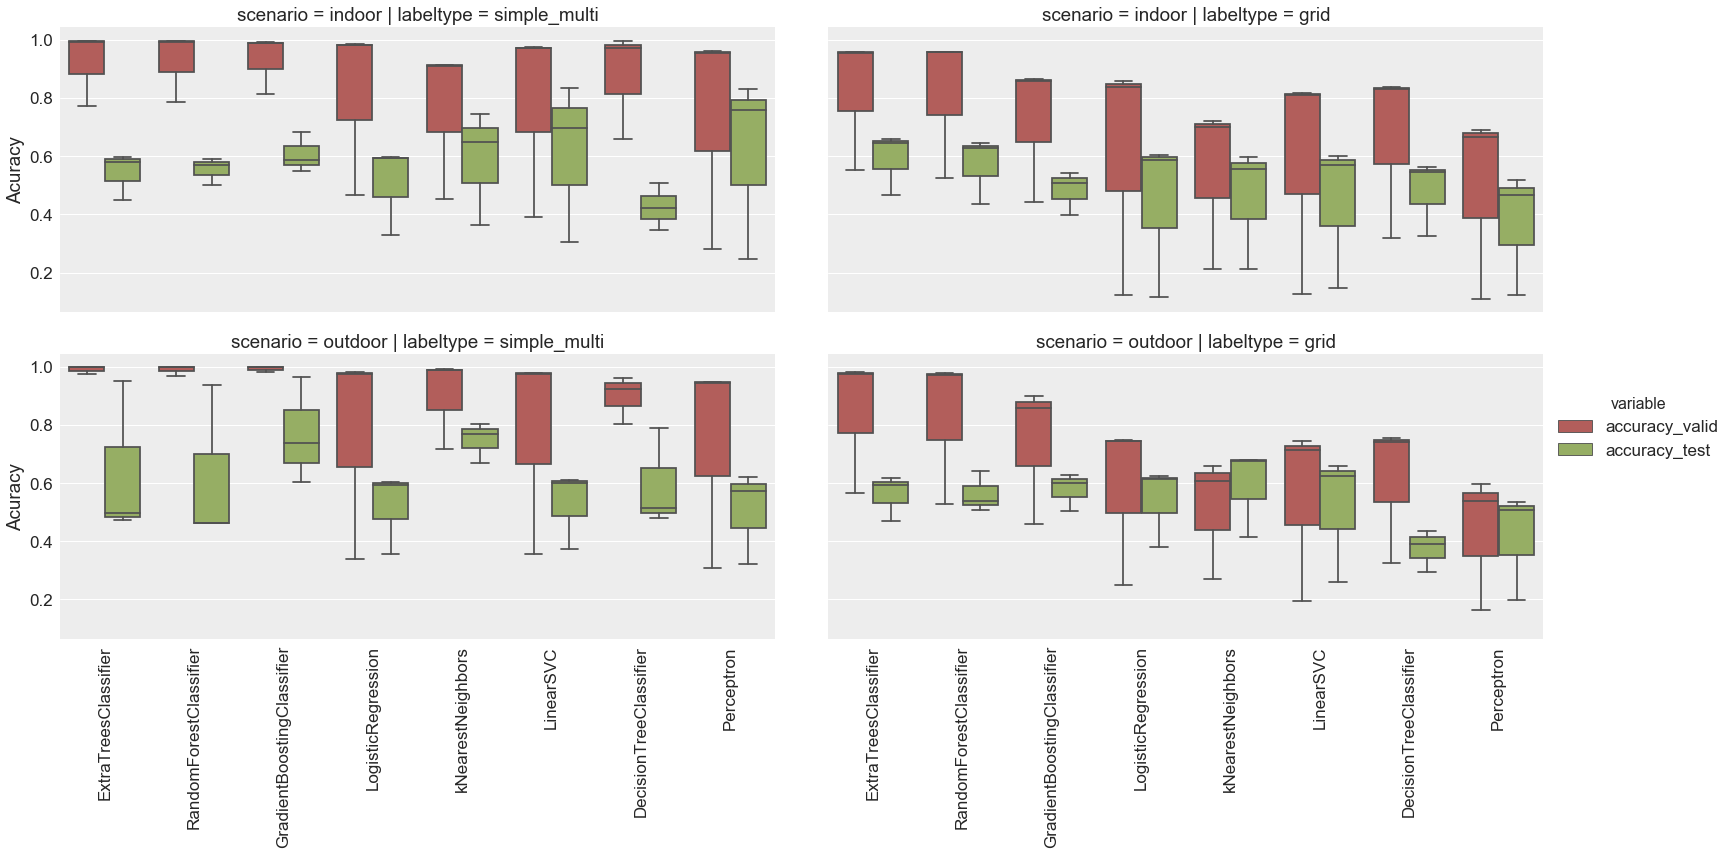

In [87]:
sns.set(font_scale=1.7,rc={'axes.facecolor':'#EDEDED'})


g = sns.factorplot(x='name', y='value', hue='variable', row ='scenario', col='labeltype',\
               data=data_final, kind='box', size=5, aspect=2.2, order=plotorder, palette=palette[0:2])
g.set_xticklabels(rotation=90)
g.set_ylabels('Acuracy')
g.set_xlabels('')
#fig_acc.tight_layout()

In [84]:
g.savefig('posterimages/final_accuracy.png', format='png', dpi=1200)

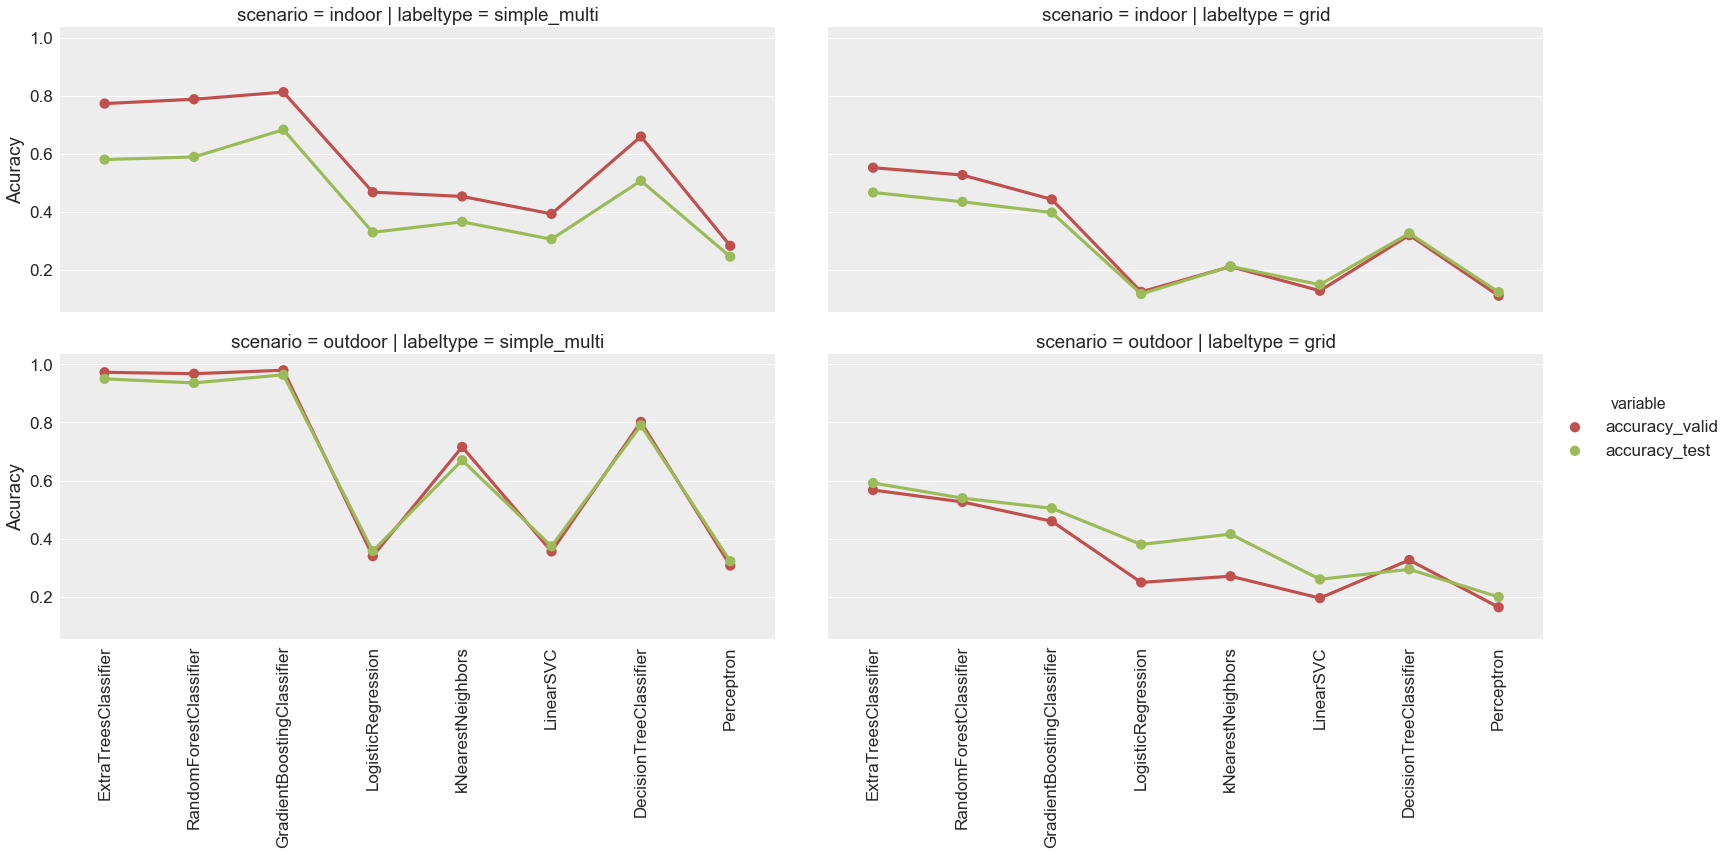

In [98]:
sns.set(font_scale=1.7,rc={'axes.facecolor':'#EDEDED'})


g = sns.factorplot(x='name', y='value', hue='variable', row ='scenario', col='labeltype',\
               data=data_final[data_final.datatype=='motionfiltered'], kind='point', size=5, aspect=2.2, order=plotorder, palette=palette[0:2])
g.set_xticklabels(rotation=90)
g.set_ylabels('Acuracy')
g.set_xlabels('')

In [99]:
g.savefig('posterimages/final_accuracy_mf.png', format='png', dpi=1200)